In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rand
from collections import Counter

In [ ]:
# Reading File for MEME-WEBSITE bipartite graph

#file=open("meme-website.txt", encoding="utf-8")
file=open("/content/drive/My Drive/Colab Notebooks/Copy of meme-website.txt", encoding="utf-8")
line=0
meme_website_dic={}
website_dic={}
start=0

count=0
meme=''

for x in file :
    line+=1
    if line%500000 ==0 :
        print(line)
    if x[0] in '0123456789' :
        start=1
        x=x.split("\t")
        meme=x[2]
        meme_website_dic[meme]=[]
    elif start==1:
        start=2
    elif start==2:
        try :
            x=x.split("\t")
            type=str(x[4])
            if type=='B':
                website=str(x[5])
                website=website[7:]
                ind=website.find('/')
                if ind!=-1:
                    website=website[:ind]
                meme_website_dic[meme].append(website)
                try :
                    website_dic[website]+=1
                except KeyError :
                    website_dic[website]=1
                count+=1
        except IndexError :
            dummy=0

file.close()

#print(count)
#print(sum(list(website_dic.values())))
print('Number of Websites found :', len(list(website_dic.keys())))
print('Number of Memes found :', len(list(meme_website_dic.keys())))
print('Established Relationship for Meme-Website')



500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000
6500000
7000000
7500000
8000000
Number of Websites found : 246032
Number of Memes found : 71568
Established Relationship for Meme-Website


In [ ]:
#Giving Labels for all nodes
#website_nodes--------nodes of all websites
#meme_nodes-------------nodes of all memes
#G.nodes["website_name"]

total_attribute_dic={}
website_nodes=list(website_dic.keys())
for i in website_nodes :
    attribute_dic={}
    attribute_dic["repubican"]=-1
    attribute_dic["democratic"]=-1
    attribute_dic["label"]=-1
    total_attribute_dic[i]=attribute_dic
meme_nodes=list(meme_website_dic.keys())
for i in meme_nodes :
    attribute_dic={}
    attribute_dic["repubican"]=-1
    attribute_dic["democratic"]=-1
    attribute_dic["label"]=-1
    total_attribute_dic[i]=attribute_dic
G=nx.Graph(meme_website_dic)
#print("@@@@@@@@@")
nx.set_node_attributes(G, total_attribute_dic)
#print("done")

#print('done')
print(G.nodes['sudarshankadam.wordpress.com'])

{'repubican': -1, 'democratic': -1, 'label': -1}


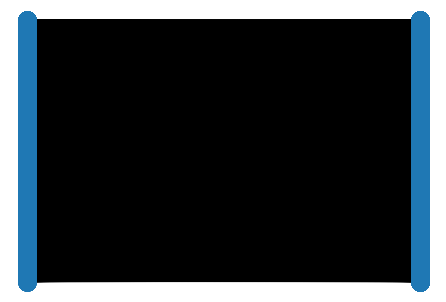

In [ ]:
position=nx.drawing.bipartite_layout(G, list(meme_website_dic.keys()))
nx.draw(G, pos=position)
plt.show()

In [ ]:
# Reading File for WEBSITE-Label

website_label_dic={}
website=""

file=open("/content/drive/My Drive/Colab Notebooks/Copy of website-label.txt", encoding="utf-8")
for x in file :
    x=x.lstrip()
    x=x.split(' ')
    if x[0]== "label" :
        website=x[1]
        website=website[1:]
        website=website[:len(website)-2]
        ind=website.find('/')
        if ind!=-1:
            website=website[:ind]
        website_label_dic[website]=-1
    elif x[0]=="value" :
        website_label_dic[website]=int(x[1])

file.close()
website_list=list(website_label_dic.keys())
print('Got Political labels for some websites from another source')
print(len(website_list), 'websites found with labels')


Got Political labels for some websites from another source
1452 websites found with labels


In [ ]:
# Removing the Meme-Website information that doesn't have labels

#website_label_dic---------keys :website name, values : it's label (0 or 1) 

import matplotlib.pyplot as plt

new_meme_website_dic={}
new_websites_dic={}
q=0
for i in meme_website_dic :
    q+=1
    if q%1000==0 :
        print(q)
    websites_arr=meme_website_dic[i]
    new_websites_arr=[]
    for j in website_list :
        if j in websites_arr :
            new_websites_arr.append(j)
            new_websites_dic[j]=website_label_dic[j]
    if new_websites_arr!=[] :
        new_meme_website_dic[i]=new_websites_arr

meme_website_dic=new_meme_website_dic
website_label_dic=new_websites_dic
print('Final number of memes considering:', len(list(meme_website_dic.keys())))
print('Final number of websites considering:', len(list(website_label_dic.keys())))
print('Done cleaning the data')







1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
Final number of memes considering: 17341
Final number of websites considering: 337
Done cleaning the data


In [ ]:
nx.draw()

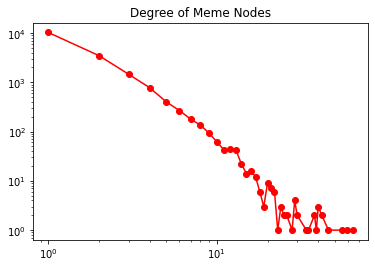

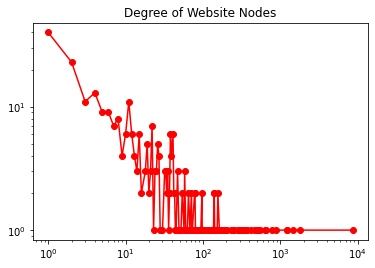

In [ ]:
################################################### For Plotting Degree graphs

G1=nx.Graph(meme_website_dic)

edges_for_meme_arr=list(meme_website_dic.values())
degree_sequence_for_meme_arr=[]
for i in edges_for_meme_arr :
    degree_sequence_for_meme_arr.append(len(i))
meme_degree_dic={}
for i in degree_sequence_for_meme_arr :
    try :
        meme_degree_dic[i]+=1
    except KeyError :
        meme_degree_dic[i]=1
x_arr_meme=sorted(meme_degree_dic)
y_arr_meme=[]
for i in x_arr_meme :
    y_arr_meme.append(meme_degree_dic[i])
#print(x_arr_meme)
#print(y_arr_meme)
plt.plot(x_arr_meme, y_arr_meme, marker='o', color='red')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree of Meme Nodes")
plt.show()
#print(degree_sequence_for_meme_arr)

website_arr_for_graph=list(website_label_dic.keys())
degree_sequence_for_website_arr=[]
for i in website_arr_for_graph :
    degree_sequence_for_website_arr.append(G1.degree[i])
website_degree_dic={}
for i in degree_sequence_for_website_arr :
    try :
        website_degree_dic[i]+=1
    except KeyError :
        website_degree_dic[i]=1
x_arr_website=sorted(website_degree_dic)
y_arr_website=[]
for i in x_arr_website :
    y_arr_website.append(website_degree_dic[i])
#print(x_arr_website)
#print(y_arr_website)
plt.plot(x_arr_website, y_arr_website, marker='o', color='red')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree of Website Nodes")
plt.show()

In [ ]:
#website_nodes--------nodes of all websites
#meme_nodes-------------nodes of all memes
#G.nodes["website_name"]
#website_label_dic---------keys :website name, values : it's label (0 or 1)
print(len(website_nodes))
print(len(website_nodes)+len(meme_nodes))
print(len(meme_nodes))
print(len(G.nodes))
print(len(website_label_dic))

246032
317600
71568
317600
337


In [ ]:

for i in website_label_dic:
  G.nodes[i]['label']=website_label_dic[i]
print(i)
print(website_label_dic[i])
print(G.nodes[i])
print("All nodes for which we have labeled data are labeled here")

americansforbayh.blogspot.com
0
{'repubican': -1, 'democratic': -1, 'label': 0}
All nodes for which we have labeled data are labeled here


In [ ]:
w_labeled_list=list(website_label_dic.keys())
not_w_labeled_list=[]

In [ ]:
## This is the algorithm we used for finding the bias of Website nodes.
def our_algo(wn,mn,wlabeledlistt,g):
  
  t=1
  E=1001
  unlabledwn=list(set(wn)-set(wlabeledlistt))

  while (E>20):
    print("t=",t)
    print("E=",E)
    now=[]
    
    if (t%2!=0):
      now=mn
      changee=0
    else:
      E=0
      now=unlabledwn
      changee=1
    print("now len",len(now))
    for i in now:
      
      neigh=list(g.neighbors(i))
      noofrep=0
      noofdem=0
      atnowlabel=g.nodes[i]['label']
      
      #print("ok2")
      #print("neigh len",len(neigh))  
      for j in neigh:
        if (g.nodes[j]['label']!=-1):
          noofdem+=g.nodes[j]['democratic']
          noofrep+=g.nodes[j]['repubican']
        #elif (g.nodes[j]['label']==1):
        #  noofrep+=1
      
      if ((noofrep>0) or (noofdem)>0):
        g.nodes[i]['repubican']=noofrep/(noofrep+noofdem)
        g.nodes[i]['democratic']=noofdem/(noofrep+noofdem)
      
        if (g.nodes[i]['repubican']>g.nodes[i]['democratic']):
          g.nodes[i]['label']=1
        elif (g.nodes[i]['repubican']<g.nodes[i]['democratic']):
          g.nodes[i]['label']=0
        else:
          g.nodes[i]['label']=rand.choice([0,1])

      if ((atnowlabel!=g.nodes[i]['label']) and (changee==1)):
        E+=1
    pranavvv(g)
    print("last E=",E)
    t+=1
  return(g)

In [ ]:
kkk=our_algo(website_nodes.copy(),meme_nodes.copy(),w_labeled_list.copy(),G.copy())

t= 1
E= 1001
now len 71568
rep= 157
dem= 180
other= 317263
last E= 1001
t= 2
E= 1001
now len 245695
rep= 157
dem= 180
other= 317263
last E= 0


In [ ]:
def pranavvv(a):
  anvr=0
  anvd=0
  anvo=0
  for i in a.nodes:
    if (a.nodes[i]['label']==0):
      anvd+=1
    elif (a.nodes[i]['label']==1):
      anvr+=1
    else:
      anvo+=1
  print("rep=",anvr)
  print("dem=",anvd)
  print("other=",anvo)

**All the things done below this are for verification purpose**

In [ ]:
Counter(list(website_label_dic.values()))

Counter({0: 180, 1: 157})

In [ ]:
nowtest=[]
for i in G.nodes:
  nowtest.append(kkk.nodes[i]['label'])
print(Counter(nowtest))

Counter({1: 316675, 0: 464, -1: 461})


In [ ]:
memeo=0
memed=0
memer=0
webo=0
webd=0
webr=0

for i in website_nodes:
  if (kkk.nodes[i]['label']==0):
    webd+=1
  elif (kkk.nodes[i]['label']==1):
    webr+=1
  else:
    webo+=1

for i in meme_nodes:
  if (kkk.nodes[i]['label']==0):
    memed+=1
  elif (kkk.nodes[i]['label']==1):
    memer+=1
  else:
    memeo+=1
#len(meme_nodes):
print("memed",memed)
print("memer",memer)
print("memeo",memeo)
print("webd",webd)
print("webr",webr)
print("webo",webo)

memed 34
memer 71088
memeo 446
webd 430
webr 245587
webo 15


In [ ]:
degtest=[]
for i in kkk.nodes:
  if(kkk.nodes[i]['label']==-1):
    degtest.append(kkk.degree(i))
Counter(degtest)

Counter({0: 432, 1: 28, 2: 1})